In [1]:
using Distributions
using LinearAlgebra
using Random
Random.seed!(4649373)
using StatsPlots
default(fmt=:png, size=(400, 280), titlefontsize=10)

In [2]:
function plot_least_squares_estimate(x, y, f...; α = 0.05, kwargs...)
    n = length(x)
    r = length(f)
    X = [f(x) for x in x, f in f]
    β̂ = X \ y
    ŷ = X * β̂
    
    f̂(x) = sum(c * f(x) for (c, f) in zip(β̂, f))
    ŝ = norm(y - ŷ)/√(n - r)
    xx(x) = [f(x) for f in f]
    invXX = inv(X'X)
    g(x) = ŝ * √(xx(x)'invXX*xx(x))
    h(x) = ŝ * √(1 + xx(x)'invXX*xx(x))
    t = quantile(TDist(n - r), 1 - α/2)

    plot(; legend=:topleft)
    scatter!(x, y; label="data", c=1, msc=:auto)
    a, b = extrema(x)
    a, b = a - 0.05(b-a), b + 0.05(b-a)
    plot!(f̂, a, b; label="", c=:red, lw=2)
    plot!(x -> f̂(x) - g(x), a, b; label="$(100(1-α))% CI", c=3, ls=:dash)
    plot!(x -> f̂(x) + g(x), a, b; label="", c=3, ls=:dash)
    plot!(x -> f̂(x) - h(x), a, b; label="$(100(1-α))% PI", c=4, ls=:dashdot)
    plot!(x -> f̂(x) + h(x), a, b; label="", c=4, ls=:dashdot)
    plot!(; kwargs...)
end

plot_least_squares_estimate (generic function with 1 method)

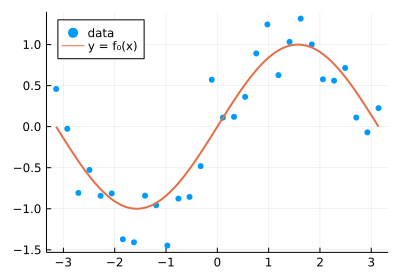

In [3]:
n = 30
f₀(x) = sin(x)
x = range(-π, π, n)
y = f₀.(x) + 0.3randn(n)
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(f₀, extrema(x)...; label="y = f₀(x)", lw=2)

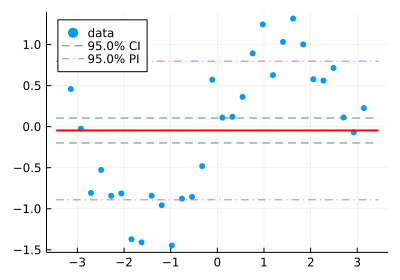

In [4]:
plot_least_squares_estimate(x, y, (x->x^k for k in 0:0)...)

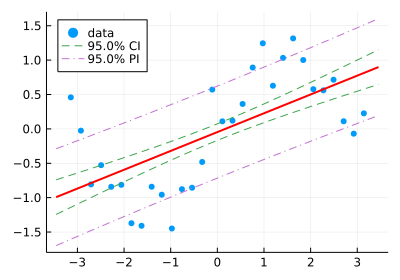

In [5]:
plot_least_squares_estimate(x, y, (x->x^k for k in 0:1)...)

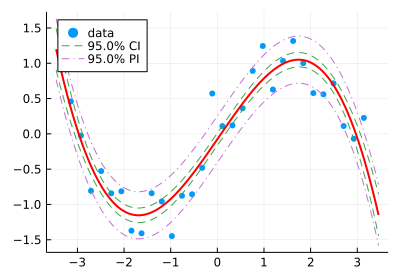

In [6]:
plot_least_squares_estimate(x, y, (x->x^k for k in 0:3)...)

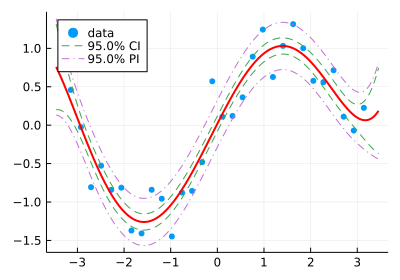

In [7]:
plot_least_squares_estimate(x, y, (x->x^k for k in 0:5)...)

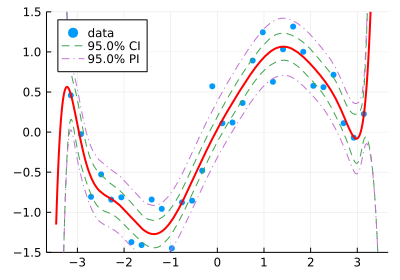

In [8]:
plot_least_squares_estimate(x, y, (x->x^k for k in 0:11)...; ylim=(-1.5, 1.5))

In [9]:
function plot_pvalue_functions(x, y, f...; α = 0.05, kwargs...)
    n = length(x)
    r = length(f)
    X = [f(x) for x in x, f in f]
    β̂ = X \ y
    ŷ = X * β̂
    
    f̂(x) = sum(c * f(x) for (c, f) in zip(β̂, f))
    s = norm(y - ŷ)/√(n - r)
    xx(x) = [f(x) for f in f]
    invXX = inv(X'X)
    g(x) = s * √(xx(x)'invXX*xx(x))
    h(x) = s * √(1 + xx(x)'invXX*xx(x))
    G(x, y) = 2ccdf(TDist(n-r), abs(y - f̂(x))/g(x))
    H(x, y) = 2ccdf(TDist(n-r), abs(y - f̂(x))/h(x))
    t = quantile(TDist(n - r), 1 - α/2)

    a, b = extrema(x)
    a, b = a - 0.05(b-a), b + 0.05(b-a)
    xs = range(a, b, 400)
    c, d = extrema(y)
    c, d = c - 0.1t*(d-c), d + 0.1t*(d-c)
    ys = range(c, d, 400)
    
    P = plot(; legend=:topleft, colorbar=false)
    heatmap!(xs, ys, sqrt∘G)
    scatter!(x, y; label="data", c=:cyan, msc=1)
    plot!(x -> f̂(x) - t*g(x), a, b; label="$(100(1-α)) CI", c=:pink, ls=:dash)
    plot!(x -> f̂(x) + t*g(x), a, b; label="", c=:pink, ls=:dash)
    plot!(; xlim=(a, b), ylim=(c, d))
    title!("P-value functon of CI")
    
    Q = plot(; legend=:topleft, colorbar=false)
    heatmap!(xs, ys, sqrt∘H)
    scatter!(x, y; label="data", c=:cyan, msc=1)
    plot!(x -> f̂(x) - t*h(x), a, b; label="$(100(1-α)) PI", c=:pink, ls=:dash)
    plot!(x -> f̂(x) + t*h(x), a, b; label="", c=:pink, ls=:dash)
    plot!(; xlim=(a, b), ylim=(c, d))
    title!("P-value function of PI")
    
    plot(P, Q; size=(800, 300), layout=(1, 2), kwargs...)
end

plot_pvalue_functions (generic function with 1 method)

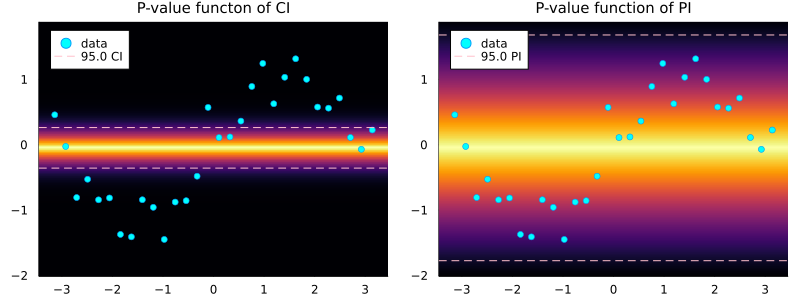

In [10]:
plot_pvalue_functions(x, y, (x->x^k for k in 0:0)...)

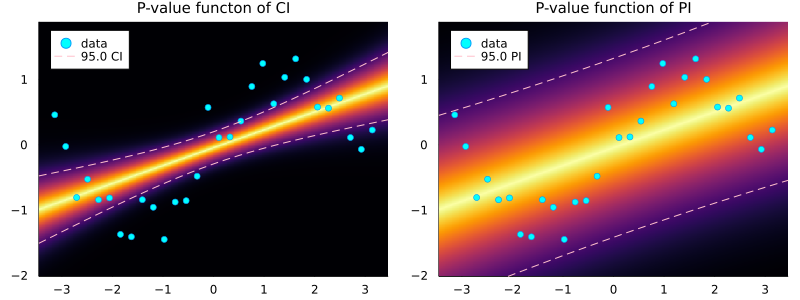

In [11]:
plot_pvalue_functions(x, y, (x->x^k for k in 0:1)...)

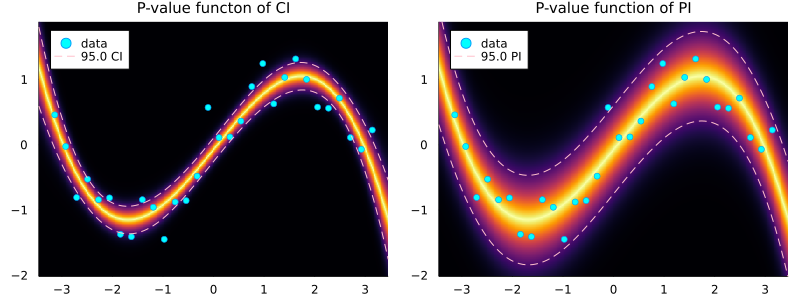

In [12]:
plot_pvalue_functions(x, y, (x->x^k for k in 0:3)...)

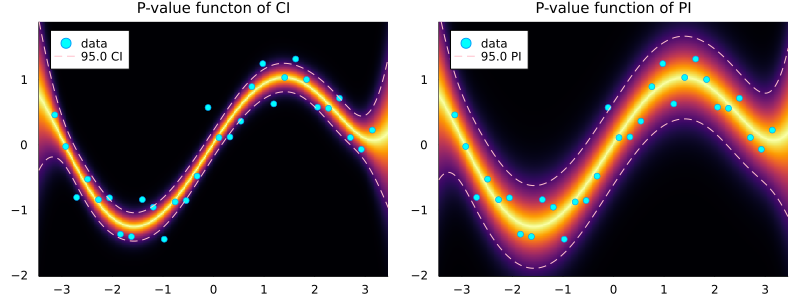

In [13]:
plot_pvalue_functions(x, y, (x->x^k for k in 0:5)...)

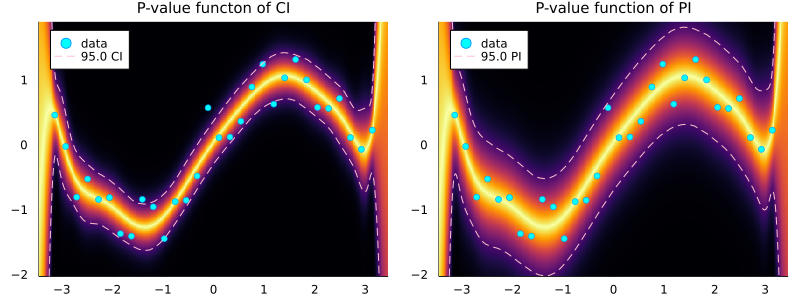

In [14]:
plot_pvalue_functions(x, y, (x->x^k for k in 0:11)...)

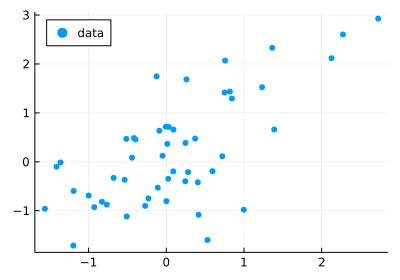

In [15]:
N = 50
X = randn(N)
Y = X + randn(N)
scatter(X, Y; label="data", legend=:topleft, msc=:auto)

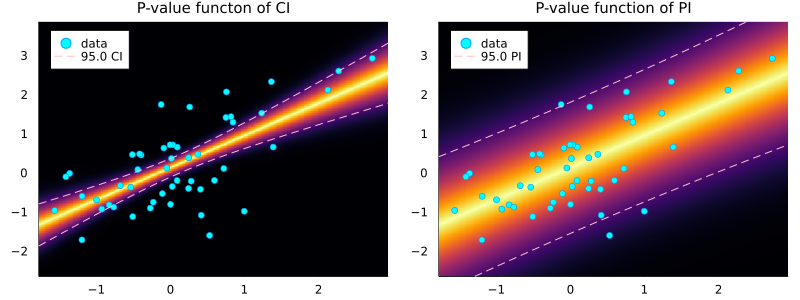

In [16]:
plot_pvalue_functions(X, Y, (x->x^k for k in 0:1)...)